***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-examples-with-sklearn" data-toc-modified-id="Clustering-examples-with-sklearn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering examples with sklearn</a></span><ul class="toc-item"><li><span><a href="#Shopping-mall-customers" data-toc-modified-id="Shopping-mall-customers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Shopping mall customers</a></span></li></ul></li></ul></div>

# Clustering examples with sklearn

## Shopping mall customers

In [2]:
import pandas as pd

# Read the CSV file
customer_data = pd.read_csv('../datasets/mall_customers.csv')

print(customer_data)


     CustomerID        Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1          Male   19                  15                      39
1             2          Male   21                  15                      81
2             3     Female      20                  16                       6
3             4        Female   23                  16                      77
4             5        Female   31                  17                      40
..          ...           ...  ...                 ...                     ...
195         196        Female   35                 120                      79
196         197        Female   45                 126                      28
197         198          Male   32                 126                      74
198         199          Male   32                 137                      18
199         200          Male   30                 137                      83

[200 rows x 5 columns]


Let's cluster for the `Annual Income` and `Spending Score` to check for correlations

In [3]:
features = customer_data.iloc[:, [3, 4]]
features

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [5]:
features.describe()

Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000

Visualize the data

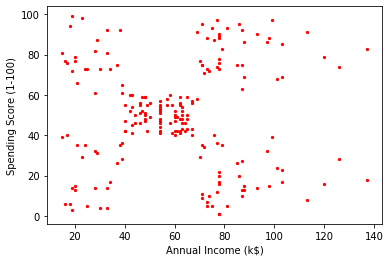

In [6]:
features.plot.scatter(x=0, y=1, c='r', s=5)

In [7]:
from sklearn.cluster import KMeans

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(features)

labels = kmeans.labels_

centers = kmeans.cluster_centers_

centers_labels = kmeans.predict(centers)

In [8]:
print(labels)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 5 3 5 3
 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5]


In [9]:
print(centers_labels)

[0 1 2 3 4 5]


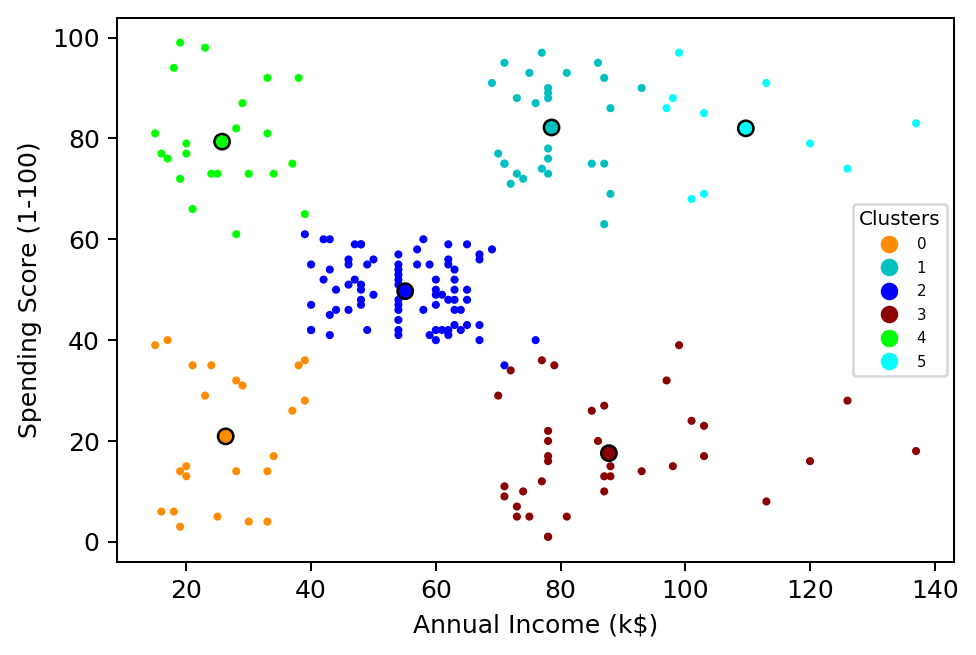

In [10]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['darkorange', 'c', 'blue', 'darkred', 'lime', 'cyan'])

plt.figsize=(10, 3)
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])

plt.scatter(features.iloc[:, 0], features.iloc[:, 1], 
            c=labels, marker='.', s=20, cmap=cmap_bold)

scatter = plt.scatter(centers[:,0], centers[:,1], 
                      c=centers_labels, marker='.', s=150, 
                      edgecolors='k',
                      cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
legend = plt.legend(*scatter.legend_elements(), loc="center right", title="Clusters", fontsize=6)
legend.get_title().set_fontsize('8')

Let's try out with different cluster numbers!!  

Predict what it will happen based on the objective function K-Means is trying to minimize.